In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 50)

In [2]:
train_data = pd.read_csv('./data/train.csv', index_col='index')
test_data = pd.read_csv('./data/test_x.csv', index_col='index')

In [3]:
train_data.shape, test_data.shape

((45532, 77), (11383, 76))

In [4]:
train_data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [5]:
train_data.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [6]:
train_data.isnull().sum().sum()

0

In [7]:
train_data['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

<AxesSubplot:xlabel='voted', ylabel='count'>

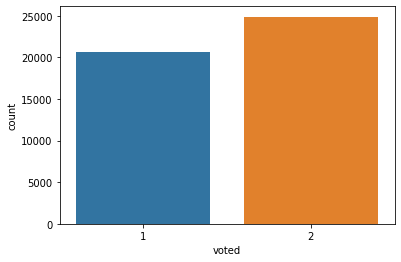

In [8]:
sns.countplot(x='voted', data=train_data)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [10]:
from lightgbm import LGBMClassifier

In [11]:
lgb_model = LGBMClassifier(n_estimators=10000, learning_rate=0.002)

In [12]:
x_all_train = train_data.drop('voted', axis=1)
x_all_label = train_data['voted']

In [13]:
object_columns = x_all_train.dtypes[x_all_train.dtypes == 'object'].index.tolist()
object_columns

['age_group', 'gender', 'race', 'religion']

In [14]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
x_all_train['label_age'] = label_en.fit_transform(x_all_train['age_group'])
test_data['label_age'] = label_en.transform(test_data['age_group'])
x_all_train['label_gender'] = label_en.fit_transform(x_all_train['gender'])
test_data['label_gender'] = label_en.transform(test_data['gender'])
x_all_train['label_race'] = label_en.fit_transform(x_all_train['race'])
test_data['label_race'] = label_en.transform(test_data['race'])
x_all_train['label_religion'] = label_en.fit_transform(x_all_train['religion'])
test_data['label_religion'] = label_en.transform(test_data['religion'])

In [15]:
x_all_train = x_all_train.drop(object_columns, axis=1)
test_data = test_data.drop(object_columns, axis=1)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_all_train, x_all_label, test_size=0.3)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((31872, 76), (13660, 76), (31872,), (13660,))

In [17]:
lgb_model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)],
             eval_metric='auc', verbose=100, early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.766481	training's binary_logloss: 0.651918	valid_1's auc: 0.760484	valid_1's binary_logloss: 0.652719
[200]	training's auc: 0.768912	training's binary_logloss: 0.626052	valid_1's auc: 0.761103	valid_1's binary_logloss: 0.62725
[300]	training's auc: 0.770377	training's binary_logloss: 0.607386	valid_1's auc: 0.761417	valid_1's binary_logloss: 0.609053
[400]	training's auc: 0.772562	training's binary_logloss: 0.593534	valid_1's auc: 0.762025	valid_1's binary_logloss: 0.59584
[500]	training's auc: 0.77486	training's binary_logloss: 0.582988	valid_1's auc: 0.762591	valid_1's binary_logloss: 0.58616
[600]	training's auc: 0.777013	training's binary_logloss: 0.574762	valid_1's auc: 0.763642	valid_1's binary_logloss: 0.578766
[700]	training's auc: 0.779278	training's binary_logloss: 0.568293	valid_1's auc: 0.764448	valid_1's binary_logloss: 0.573212
[800]	training's auc: 0.781829	training's binary_logloss: 0.5

LGBMClassifier(learning_rate=0.002, n_estimators=10000)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

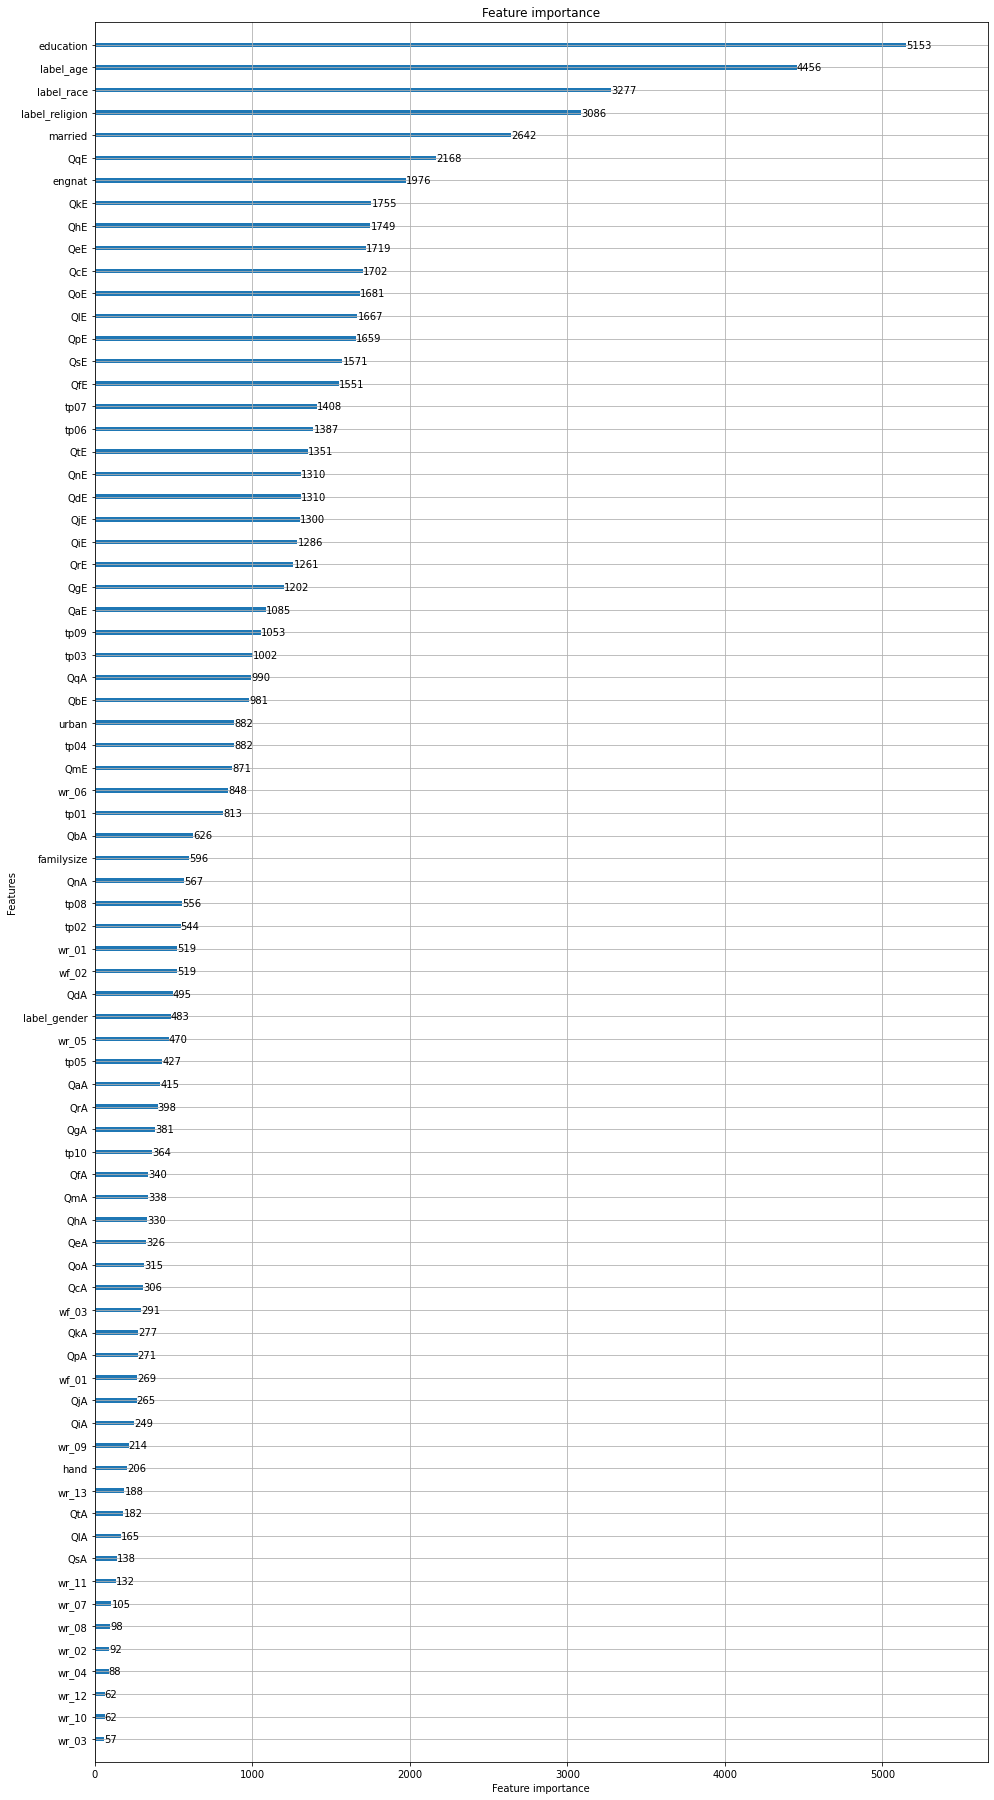

In [18]:
from lightgbm import plot_importance
plot_importance(lgb_model, figsize=(16,32))

In [86]:
preds = lgb_model.predict(test_data)

In [91]:
sub_data = pd.DataFrame()

In [94]:
sub_data['index'] = test_data.index
sub_data['voted'] = preds

In [95]:
sub_data.head()

,index,voted
0,0,2
1,1,2
2,2,1
3,3,1
4,4,2


In [96]:
sub_data.to_csv('baseline_01.csv', index=False)

## Score 0.70322